In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [66]:
train_data=pd.read_csv('/content/drive/MyDrive/CMPE 255/Group Project/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/CMPE 255/Group Project/test.csv')

In [67]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [68]:
train_data.shape

(381109, 12)

In [69]:
train_data = train_data.drop(['id'], axis=1)
test_data = test_data.drop(['id'], axis=1)

In [70]:
train_data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [71]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [72]:
train_data[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [73]:
train_data[categorical_columns].describe()

,Driving_License,Previously_Insured,Response
count,381109.000000,381109.000000,381109.000000
mean,0.997869,0.458210,0.122563
std,0.046110,0.498251,0.327936
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


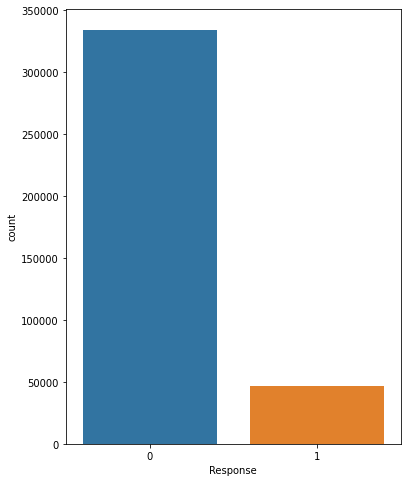

In [74]:
sns.countplot(train_data['Response'])

In [75]:
train_data.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [76]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
            'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes',
            'Region_Code','Policy_Sales_Channel']

In [77]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [78]:
#Converting The categorical feature 'Gender' to a binary variable. Can be done using get_dummies pandas as well
train_data.loc[train_data['Gender'] == 'Male', 'Gender'] = 1
train_data.loc[train_data['Gender'] == 'Female', 'Gender'] = 0
test_data.loc[test_data['Gender'] == 'Male', 'Gender'] = 1
test_data.loc[test_data['Gender'] == 'Female', 'Gender'] = 0

In [79]:
#Converting the categorical feature Vehical age to numerical
train_data.loc[train_data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train_data.loc[train_data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train_data.loc[train_data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

test_data.loc[test_data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test_data.loc[test_data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test_data.loc[test_data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

In [80]:
#Converting the categorical feature Vehical Damage to numerical
train_data.loc[train_data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train_data.loc[train_data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test_data.loc[test_data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test_data.loc[test_data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [81]:
for col in train_data.columns:
    train_data[col] = train_data[col].astype(np.int32)

In [82]:
for col in train_data.columns:
    if col == 'Response':
        continue
    print(col, train_data[col].corr(train_data['Response']))

Gender 0.05243991377134205
Age 0.11114689471251019
Driving_License 0.01015517459407371
Region_Code 0.01056985561522313
Previously_Insured -0.34117046261352385
Vehicle_Age 0.2218739872179906
Vehicle_Damage 0.35439954387975453
Annual_Premium 0.022574695542560037
Policy_Sales_Channel -0.139041500829161
Vintage -0.0010503720019898887


In [83]:
from sklearn.utils import resample,shuffle
train_majority = train_data[train_data['Response']==0]
train_minority = train_data[train_data['Response']==1]
train_majority_downsampled = resample(train_majority,replace=False,n_samples=46710)

In [84]:
balanced_train_data = pd.concat([train_minority,train_majority_downsampled])
balanced_train_data = shuffle(balanced_train_data)
balanced_train_data.Response.value_counts()

1    46710
0    46710
Name: Response, dtype: int64

In [85]:
balanced_train_data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000
mean,0.570349,40.845815,0.998309,26.609976,0.261507,0.755770,0.709291,31034.173111,103.275605,154.277296,0.500000
std,0.495029,14.348200,0.041091,12.638484,0.439458,0.564222,0.454092,17849.966340,55.899197,83.714929,0.500003
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,27.000000,1.000000,16.000000,0.000000,0.000000,0.000000,24548.750000,26.000000,82.000000,0.000000
50%,1.000000,41.000000,1.000000,28.000000,0.000000,1.000000,1.000000,32243.000000,124.000000,154.000000,0.500000
75%,1.000000,50.000000,1.000000,34.000000,1.000000,1.000000,1.000000,40280.000000,152.000000,227.000000,1.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [86]:
balanced_train_data.shape

(93420, 11)

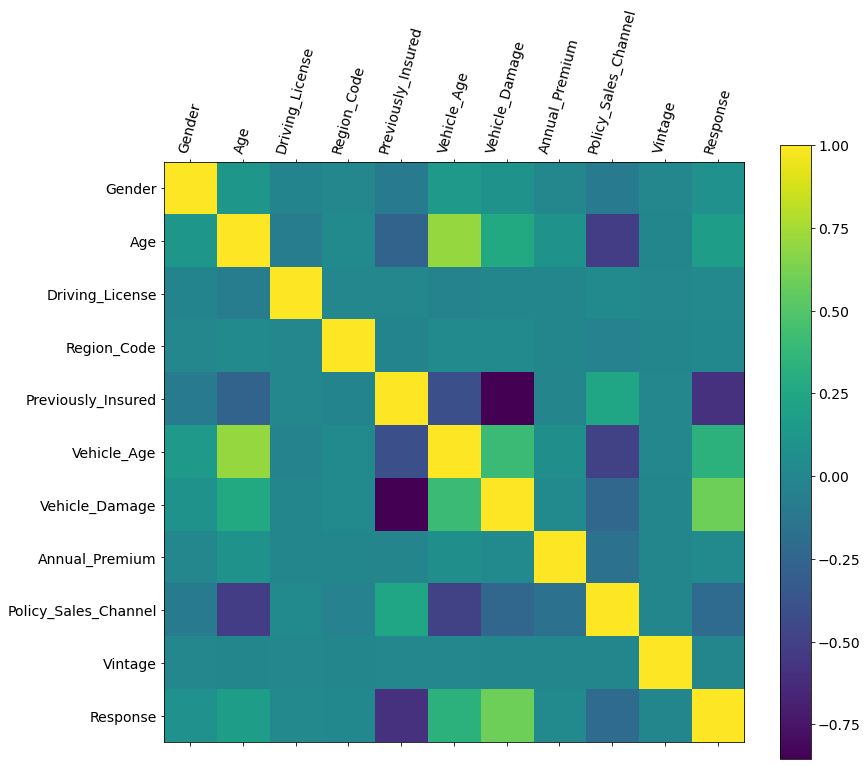

In [87]:
f = plt.figure(figsize=(13, 11))
plt.matshow(balanced_train_data.corr(), fignum=f.number)
plt.xticks(range(balanced_train_data.shape[1]), balanced_train_data.columns, fontsize=14, rotation=75)
plt.yticks(range(balanced_train_data.shape[1]), balanced_train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Age distribution according to Response


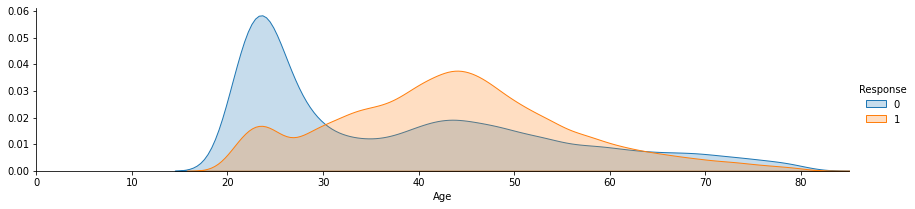

In [50]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(balanced_train_data,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,balanced_train_data["Age"].max()))
facetgrid.add_legend();

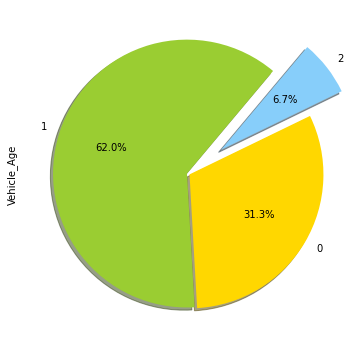

In [51]:
plt.rcParams['figure.figsize']=(6,8)
color = ['yellowgreen','gold',"lightskyblue"]
balanced_train_data['Vehicle_Age'].value_counts().plot.pie(y="Vehicle_Age",colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%")
plt.axis('on');

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [88]:
num_feat

['Age', 'Vintage']

In [89]:
scale = StandardScaler()
balanced_train_data[num_feat] = scale.fit_transform(balanced_train_data[num_feat])

In [90]:
min_max = MinMaxScaler()
balanced_train_data[['Annual_Premium']] = min_max.fit_transform(balanced_train_data[['Annual_Premium']])

In [91]:
balanced_train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
69425,0,0.080442,1,8,0,2,1,0.000000,157,1.143443,0
104167,1,-0.755905,1,46,1,0,0,0.044425,152,-1.365084,0
236213,1,0.150137,1,28,0,1,1,0.042336,122,-0.839488,0
87252,0,0.289528,1,44,0,1,1,0.035921,124,-0.349728,1
281047,1,-1.313469,1,29,1,0,0,0.057723,152,1.334568,0
